In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# Show plots inline if using Jupyter Notebook
%matplotlib inline


In [9]:
df = sns.load_dataset('titanic')
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
data = df[['age', 'fare']].copy()

In [11]:
print(data.isnull().sum())

age     177
fare      0
dtype: int64


In [12]:
data['age'].fillna(data['age'].median(), inplace=True)

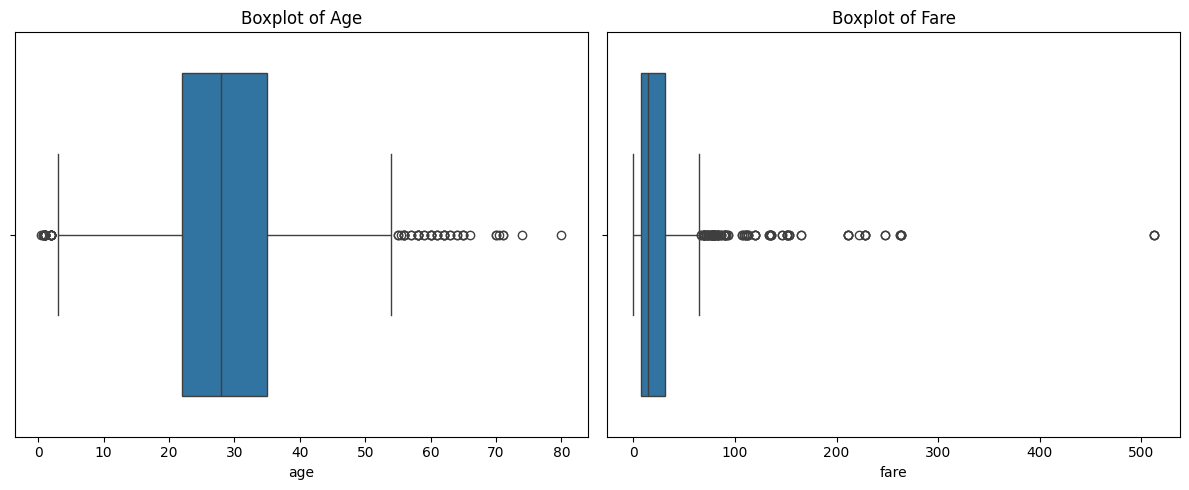

In [13]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=data['age'])
plt.title('Boxplot of Age')

plt.subplot(1, 2, 2)
sns.boxplot(x=data['fare'])
plt.title('Boxplot of Fare')

plt.tight_layout()
plt.show()


In [14]:
def detect_outliers_iqr(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = col[(col < lower) | (col > upper)]
    return outliers

outliers_age = detect_outliers_iqr(data['age'])
outliers_fare = detect_outliers_iqr(data['fare'])

print("Outliers in Age:\n", outliers_age)
print("\nOutliers in Fare:\n", outliers_fare)


Outliers in Age:
 7       2.00
11     58.00
15     55.00
16      2.00
33     66.00
       ...  
827     1.00
829    62.00
831     0.83
851    74.00
879    56.00
Name: age, Length: 66, dtype: float64

Outliers in Fare:
 1       71.2833
27     263.0000
31     146.5208
34      82.1708
52      76.7292
         ...   
846     69.5500
849     89.1042
856    164.8667
863     69.5500
879     83.1583
Name: fare, Length: 116, dtype: float64


In [15]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


In [16]:
data = remove_outliers_iqr(data, 'age')
data = remove_outliers_iqr(data, 'fare')


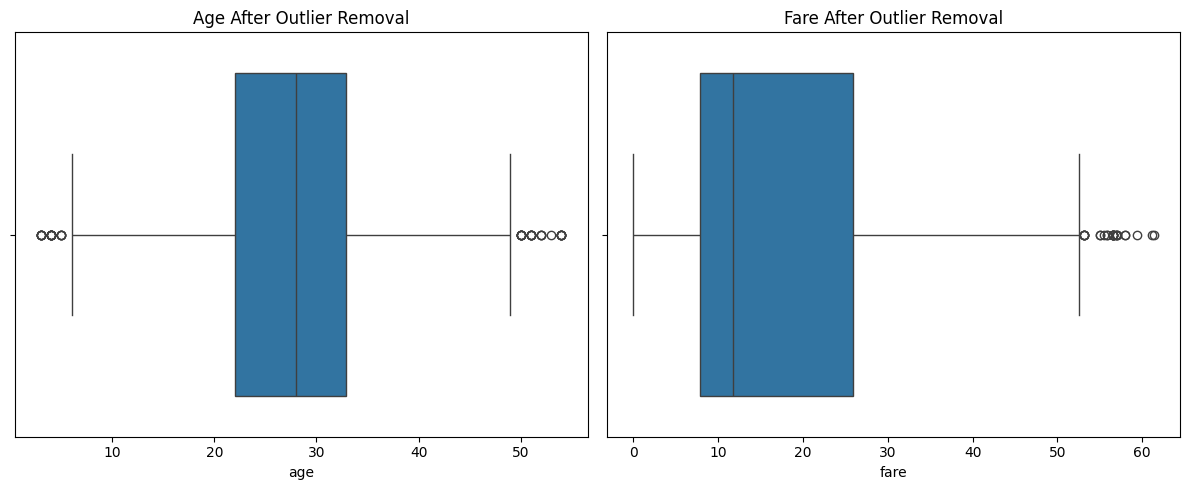

In [17]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=data['age'])
plt.title('Age After Outlier Removal')

plt.subplot(1, 2, 2)
sns.boxplot(x=data['fare'])
plt.title('Fare After Outlier Removal')

plt.tight_layout()
plt.show()


In [18]:
print(data.describe())
print("Final shape:", data.shape)


              age        fare
count  718.000000  718.000000
mean    28.079387   17.193204
std     10.012369   13.244507
min      3.000000    0.000000
25%     22.000000    7.889575
50%     28.000000   11.750000
75%     32.875000   25.928150
max     54.000000   61.379200
Final shape: (718, 2)
